#### The Challenge
 
You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. You want to understand the customers like who are the target customers so that the sense can be given to marketing team and plan the strategy accordingly.

#### Importing Libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('Mall_Customers.csv')

In [36]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [72]:
df.shape

(200, 5)

In [38]:
df.describe()  #checking 5 number summanry

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [39]:
# checking null
df.isnull().sum()  

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no outliers and data is clean

#### Checking Outiler 


<AxesSubplot:ylabel='Annual Income (k$)'>

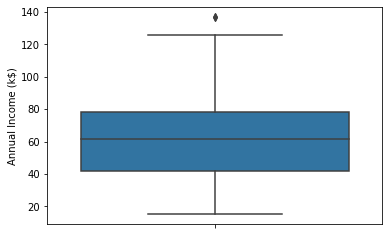

In [40]:
sns.boxplot(y ='Annual Income (k$)', data = df)


In [41]:
# treating the outlier

Q1 = df['Annual Income (k$)'].quantile(0.25)

Q3= df['Annual Income (k$)'].quantile(0.75)


In [42]:
# IQR

IQR = Q3 - Q1

In [43]:
# lower and upper limits

low_limit = Q1 - 1.5 * IQR

upp_limit = Q3 + 1.5 * IQR

print("lower limit is", low_limit)
print('upper limit is', upp_limit)


lower limit is -13.25
upper limit is 132.75


In [44]:
outlier = []

for i in df['Annual Income (k$)']:
    if ((i> upp_limit) or (i<low_limit)):
         outlier.append(i)
print(' outlier in the dataset is', outlier)

 outlier in the dataset is [137, 137]


In [45]:
len(outlier)

2

 We are replacing outlier with median, beacuse the total no. of observation are low,so we can not drop those outliers value.
 median are not affected by outlier.

In [46]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [47]:
## The outiler is replaced by the median 61.5K $ 

df.loc[df['Annual Income (k$)'] >= 137, 'Annual Income (k$)'] = 61.5

<AxesSubplot:ylabel='Annual Income (k$)'>

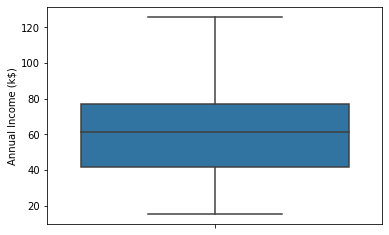

In [48]:
#outlier is removed now
sns.boxplot(y="Annual Income (k$)", data=df)

<AxesSubplot:ylabel='Spending Score (1-100)'>

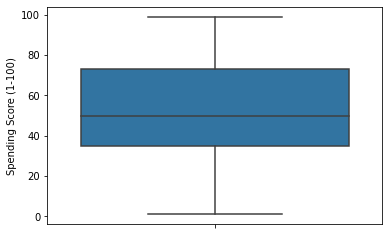

In [49]:
#checking outlier for Spending Score

sns.boxplot(y="Spending Score (1-100)", data=df)

No outliers in spending score

<AxesSubplot:ylabel='Age'>

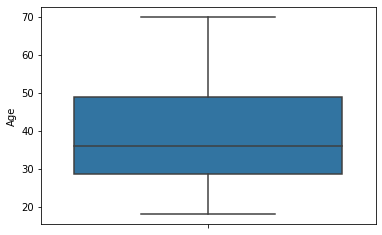

In [50]:
#checking outlier for Age
sns.boxplot(y="Age", data=df)

No outliers in Age column

#### Visualization

Text(0.5, 1.0, 'Spending Score')

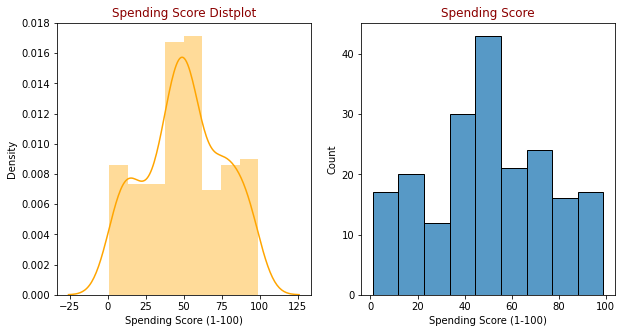

In [52]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['Spending Score (1-100)'], fit= None, color= 'orange')
plt.title("Spending Score Distplot", color = "darkred")

plt.subplot(1,2,2)
sns.histplot(df['Spending Score (1-100)'])
plt.title("Spending Score", color = "darkred")

Text(0.5, 1.0, 'Annual income')

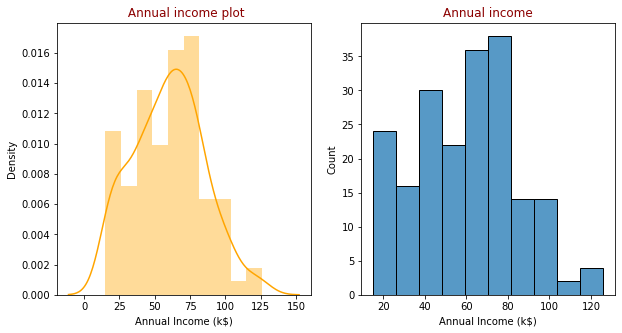

In [53]:
# Annual income distribution

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['Annual Income (k$)'], fit= None, color= 'orange')
plt.title(" Annual income plot", color = "darkred")

plt.subplot(1,2,2)
sns.histplot(df['Annual Income (k$)'])
plt.title("Annual income", color = "darkred")

#### Visualizing the annual income vs spending score.
#### This will help us in deciding how many cluster we need.


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

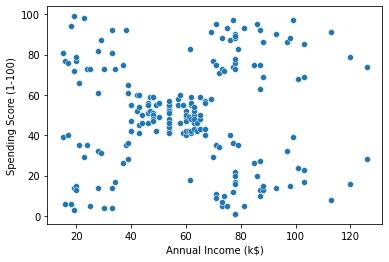

In [56]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

#### Model building

#### K Means clustering

In [59]:
from sklearn.cluster import KMeans

In [60]:
# making cluster on these two features :  Annual income 2. Spending score

In [62]:
clus = df.iloc[:,[3,4]].values   # cluster used for analysis annual income and spending score

- first we need to decide the number of cluster
- for this we use elbow curve.
- by seeing the elbow curve and earlier scater plot we can easily decide , how many clusters are needed .

In [63]:
# wcss is within cluster sum of squares

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(clus)

  wcss.append(kmeans.inertia_)

#### Elbow curve 

To get optimal number of clusters

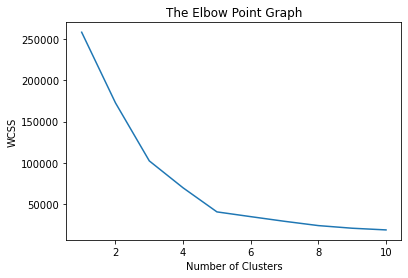

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel="Number of Clusters", ylabel="WCSS")
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')

plt.show()

In [66]:
# training the k means algo with 6 clusters

kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(clus)

print(Y)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 4 1 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 0 2 0 4 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 4 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 5 2 5 2 5 2
 5 2 5 2 5 2 5 2 5 2 5 2 5 2 0]


In [69]:
print(np.unique(Y))

[0 1 2 3 4]


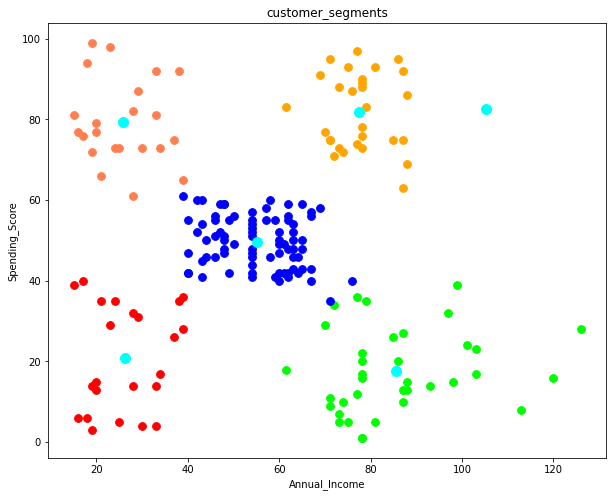

In [67]:
plt.figure(figsize=(10,8))
plt.scatter(clus[Y==0,0], clus[Y==0,1], s=60, c='orange', label='Cluster 1')
plt.scatter(clus[Y==1,0], clus[Y==1,1], s=60, c='red', label='Cluster 2')
plt.scatter(clus[Y==2,0], clus[Y==2,1], s=60, c='lime', label='Cluster 3')
plt.scatter(clus[Y==3,0], clus[Y==3,1], s=60, c='coral', label='Cluster 4')
plt.scatter(clus[Y==4,0], clus[Y==4,1], s=60, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('customer_segments')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.show()

The optimal value of cluster should have been 5

In [68]:
# now we will optimize our code to get 5 cluster

# training the k means algo
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(clus)

print(Y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [70]:
print(np.unique(Y))

[0 1 2 3 4]


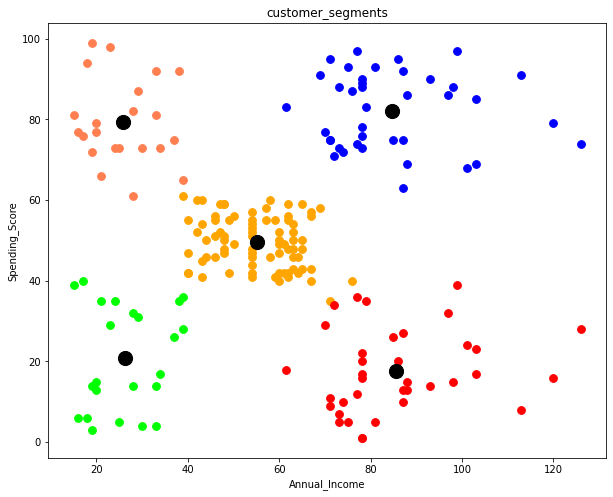

In [71]:
plt.figure(figsize=(10,8))
plt.scatter(clus[Y==0,0], clus[Y==0,1], s=60, c='orange', label='Cluster 1')
plt.scatter(clus[Y==1,0], clus[Y==1,1], s=60, c='red', label='Cluster 2')
plt.scatter(clus[Y==2,0], clus[Y==2,1], s=60, c='lime', label='Cluster 3')
plt.scatter(clus[Y==3,0], clus[Y==3,1], s=60, c='coral', label='Cluster 4')
plt.scatter(clus[Y==4,0], clus[Y==4,1], s=60, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black')

plt.title('customer_segments')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.show()

5 clusters are formed from above analysis.

 #### Conclusion
 
 - Using this information we can run target advertisment for different group with different need.
 
 - This will help to increase our sales and profit of the company and helps in cost cutting.
 
 - we can also decide to provide coupon and we can measure the effect of coupon on sales in different groups.